In [4]:
print("hello world")

hello world


In [5]:
from pybaseball import statcast

In [6]:
data = statcast(start_dt="2022-04-01", end_dt="2022-09-30")
data.head()

This is a large query, it may take a moment to complete


c:\01_react_django\easily_analyze_baseball_data\venv\Lib\site-packages\pybaseball\statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)
  0%|          | 0/183 [00:00<?, ?it/s]c:\01_react_django\easily_analyze_baseball_data\venv\Lib\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and cat

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,...,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
3012,CU,2022-09-30,74.9,-2.62,4.7,"Herget, Jimmy",669701,623474,strikeout,swinging_strike,<NA>,<NA>,<NA>,<NA>,14,Josh H. Smith strikes out swinging.,R,L,R,LAA,TEX,S,2,NaN,1,2,2022,1.51,0.38,0.96,1.88,<NA>,<NA>,<NA>,2,9,Top,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,73.1,2695,4.9,663406,623474,681351,622110,664058,650859,670869,666176,545361,621493,55.61,<NA>,<NA>,0.0,1,0,0,<NA>,70,4,Curveball,4,1,1,4,1,4,1,4,Standard,Standard,79,0.004,-0.07
3093,SL,2022-09-30,84.9,-2.37,5.02,"Herget, Jimmy",669701,623474,NaN,called_strike,<NA>,<NA>,<NA>,<NA>,7,Josh H. Smith strikes out swinging.,R,L,R,LAA,TEX,S,<NA>,NaN,1,1,2022,0.38,0.32,-0.6,1.54,<NA>,<NA>,<NA>,2,9,Top,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,82.8,2656,4.7,663406,623474,681351,622110,664058,650859,670869,666176,545361,621493,55.78,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,70,3,Slider,4,1,1,4,1,4,1,4,Infield shift,Standard,198,0.0,-0.023
3167,CH,2022-09-30,86.8,-2.18,4.99,"Herget, Jimmy",669701,623474,NaN,ball,<NA>,<NA>,<NA>,<NA>,14,Josh H. Smith strikes out swinging.,R,L,R,LAA,TEX,B,<NA>,NaN,0,1,2022,-1.14,-0.39,0.27,0.53,<NA>,<NA>,<NA>,2,9,Top,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,84.8,1693,5.0,663406,623474,681351,622110,664058,650859,670869,666176,545361,621493,55.54,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,70,2,Changeup,4,1,1,4,1,4,1,4,Infield shift,Standard,268,0.0,0.011
3249,SL,2022-09-30,85.0,-2.35,5.12,"Herget, Jimmy",669701,623474,NaN,called_strike,<NA>,<NA>,<NA>,<NA>,5,Josh H. Smith strikes out swinging.,R,L,R,LAA,TEX,S,<NA>,NaN,0,0,2022,0.35,0.37,0.11,2.35,<NA>,<NA>,<NA>,2,9,Top,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,83.0,2564,4.8,663406,623474,681351,622110,664058,650859,670869,666176,545361,621493,55.66,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,70,1,Slider,4,1,1,4,1,4,1,4,Infield shift,Standard,210,0.0,-0.017
3387,CU,2022-09-30,73.2,-2.58,3.99,"Herget, Jimmy",673962,623474,field_out,hit_into_play,<NA>,<NA>,<NA>,<NA>,4,Josh Jung flies out to left fielder Jo Adell.,R,R,R,LAA,TEX,X,7,fly_ball,1,2,2022,1.49,0.74,-0.5,2.55,<NA>,<NA>,<NA>,1,9,Top,34.69,95.04,<NA>,...,338,99.7,43,71.2,2637,4.9,663406,623474,681351,622110,664058,650859,670869,666176,545361,621493,55.64,0.069,0.127,0.0,1,0,0,3,69,4,Curveball,4,1,1,4,1,4,1,4,Standard,Standard,90,0.009,-0.112


In [9]:
data_ohtani = data[data['player_name']=='Ohtani, Shohei']
data_ohtani.to_csv("2022_Ohtani.csv")
data_ohtani.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,...,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,ST,2022-09-29,85.6,-2.52,5.75,"Ohtani, Shohei",669127,660271,field_out,hit_into_play,<NA>,<NA>,<NA>,<NA>,3,"Shea Langeliers grounds out, third baseman Lui...",R,R,R,LAA,OAK,X,5,ground_ball,3,2,2022,0.98,0.69,0.35,3.33,<NA>,668843,660650,2,8,Top,102.59,169.32,<NA>,...,71,78.8,4,85.5,2611,6.7,663420,660271,545358,622110,664058,650859,670869,666176,545361,621493,53.84,0.266,0.258,0.0,1,0,0,2,60,9,Sweeper,4,0,0,4,0,4,0,4,Standard,Standard,65,0.018,-0.461
1,ST,2022-09-29,84.3,-2.58,5.64,"Ohtani, Shohei",669127,660271,NaN,foul,<NA>,<NA>,<NA>,<NA>,9,"Shea Langeliers grounds out, third baseman Lui...",R,R,R,LAA,OAK,S,<NA>,NaN,3,2,2022,1.47,0.22,0.32,1.62,<NA>,668843,660650,2,8,Top,<NA>,<NA>,<NA>,...,3,68.9,-34,84.7,2641,6.6,663420,660271,545358,622110,664058,650859,670869,666176,545361,621493,53.93,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,60,8,Sweeper,4,0,0,4,0,4,0,4,Standard,Standard,63,0.0,0.0
2,ST,2022-09-29,84.7,-3.19,5.48,"Ohtani, Shohei",669127,660271,NaN,ball,<NA>,<NA>,<NA>,<NA>,14,"Shea Langeliers grounds out, third baseman Lui...",R,R,R,LAA,OAK,B,<NA>,NaN,2,2,2022,1.11,0.58,1.89,2.37,<NA>,668843,660650,2,8,Top,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,85.0,2425,6.7,663420,660271,545358,622110,664058,650859,670869,666176,545361,621493,53.75,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,60,7,Sweeper,4,0,0,4,0,4,0,4,Standard,Standard,69,0.0,0.104
3,ST,2022-09-29,84.7,-2.63,5.7,"Ohtani, Shohei",669127,660271,NaN,foul,<NA>,<NA>,<NA>,<NA>,4,"Shea Langeliers grounds out, third baseman Lui...",R,R,R,LAA,OAK,S,<NA>,NaN,2,2,2022,0.94,0.33,-0.66,2.41,<NA>,668843,660650,2,8,Top,<NA>,<NA>,<NA>,...,7,93.0,-20,85.1,2416,6.6,663420,660271,545358,622110,664058,650859,670869,666176,545361,621493,53.89,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,60,6,Sweeper,4,0,0,4,0,4,0,4,Standard,Standard,64,0.0,0.0
4,SL,2022-09-29,83.2,-1.96,6.26,"Ohtani, Shohei",669127,660271,NaN,foul,<NA>,<NA>,<NA>,<NA>,1,"Shea Langeliers grounds out, third baseman Lui...",R,R,R,LAA,OAK,S,<NA>,NaN,2,2,2022,0.45,-0.11,-0.83,3.33,<NA>,668843,660650,2,8,Top,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,84.0,2453,6.6,663420,660271,545358,622110,664058,650859,670869,666176,545361,621493,53.88,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,60,5,Slider,4,0,0,4,0,4,0,4,Standard,Standard,70,0.0,0.0


# 大谷翔平の2022年のデータを分析する！！！

In [28]:
# Python3.12だった場合、importエラーになる。
# 対処方法は以下のサイトに記載されていました。
# https://teratail.com/questions/ispptkd2y6ai7t
import japanize_matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv("data/2022_Ohtani.csv")
df.head(1)

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,...,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,0,ST,2022-09-29,85.6,-2.52,5.75,"Ohtani, Shohei",669127,660271,field_out,hit_into_play,NaN,NaN,NaN,NaN,3,"Shea Langeliers grounds out, third baseman Lui...",R,R,R,LAA,OAK,X,5.0,ground_ball,3,2,2022,0.98,0.69,0.35,3.33,NaN,668843.0,660650.0,2,8,Top,102.59,169.32,...,71.0,78.8,4.0,85.5,2611.0,6.7,663420,660271,545358,622110,664058,650859,670869,666176,545361,621493,53.84,0.266,0.258,0.0,1.0,0.0,0.0,2.0,60,9,Sweeper,4,0,0,4,0,4,0,4,Standard,Standard,65.0,0.018,-0.461


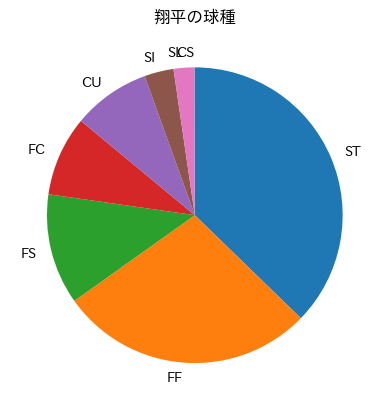

In [35]:
# 球種割合グラフを作成
counts = df["pitch_type"].value_counts()
plt.pie(counts, labels=counts.index, counterclock=False, startangle=90)
plt.title('翔平の球種')
plt.show()

# 球種ごとの平均球速を示すグラフ

In [38]:
df["speed_km"] = df["release_speed"]*1.61
df.head(1)

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,...,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,speed_km
0,0,ST,2022-09-29,85.6,-2.52,5.75,"Ohtani, Shohei",669127,660271,field_out,hit_into_play,NaN,NaN,NaN,NaN,3,"Shea Langeliers grounds out, third baseman Lui...",R,R,R,LAA,OAK,X,5.0,ground_ball,3,2,2022,0.98,0.69,0.35,3.33,NaN,668843.0,660650.0,2,8,Top,102.59,169.32,...,78.8,4.0,85.5,2611.0,6.7,663420,660271,545358,622110,664058,650859,670869,666176,545361,621493,53.84,0.266,0.258,0.0,1.0,0.0,0.0,2.0,60,9,Sweeper,4,0,0,4,0,4,0,4,Standard,Standard,65.0,0.018,-0.461,137.816


In [40]:
# 球種ごとに分類
Fastball = df[df["pitch_type"]=="FF"]
Cutter   = df[df["pitch_type"]=="FC"]
Sweeper  = df[df["pitch_type"]=="ST"]
Curve    = df[df["pitch_type"]=="CU"]
Splitter = df[df["pitch_type"]=="FS"]

In [41]:
x = ["ストレート", "カット", "スイーパー", "カーブ", "スプリット"]
y = [Fastball["speed_km"].mean(), Cutter["speed_km"].mean(),Sweeper["speed_km"].mean(),Curve["speed_km"].mean(),Splitter["speed_km"].mean()]

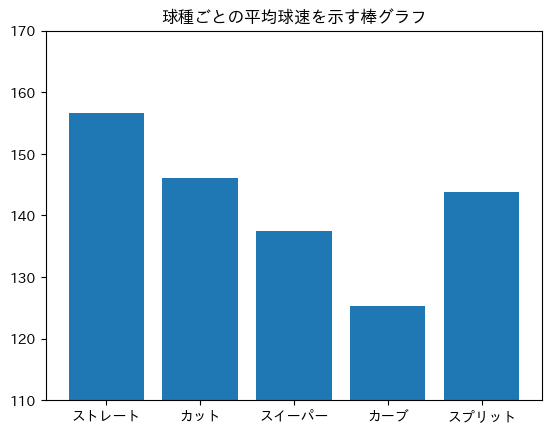

In [44]:
plt.bar(x, y)
plt.title("球種ごとの平均球速を示す棒グラフ")
plt.ylim(110, 170)
plt.show()